# **5.03 CNNでカラー画像（cifar10）の学習**

# 【データの準備と確認】

リスト5-15：（リストA）

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 77.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=153d329c5663ea5bb940988654f72d0e3792042678f73ea351d1c8ea2bdc3b67
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト5-16

In [2]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 [==============================] - 13s 0us/step
学習データ（問題画像）　：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


リスト5-17

In [3]:
class_names = ["飛行機", "自動車", "鳥", "ネコ", "シカ",
               "イヌ", "カエル", "ウマ", "船", "トラック"]

# 【モデルを作って学習】

リスト5-18

In [4]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary(line_length=120)

Model: "sequential"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 conv2d (Conv2D)                                      (None, 28, 28, 32)                              2432              
                                                                                                                        
 max_pooling2d (MaxPooling2D)                         (None, 14, 14, 32)                              0                 
                                                                                                                        
 dropout (Dropout)                                    (None, 14, 14, 32)                              0                 
                                                                                                                        
 conv2d_1 (C

リスト5-19（リストB’）

In [5]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20, #20
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/20
1563/1563 [==============================] - 24s 6ms/step - loss: 1.6800 - accuracy: 0.3794 - val_loss: 1.3638 - val_accuracy: 0.5042
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3800 - accuracy: 0.5034 - val_loss: 1.2618 - val_accuracy: 0.5542
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2568 - accuracy: 0.5505 - val_loss: 1.1293 - val_accuracy: 0.5993
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1843 - accuracy: 0.5804 - val_loss: 1.0770 - val_accuracy: 0.6221
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1295 - accuracy: 0.6007 - val_loss: 1.0427 - val_accuracy: 0.6328
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0817 - accuracy: 0.6183 - val_loss: 0.9858 - val_accuracy: 0.6549
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0410 - accuracy: 0.6317 - val_loss: 0.9747 - val_accuracy

リスト5-20：（リストC）

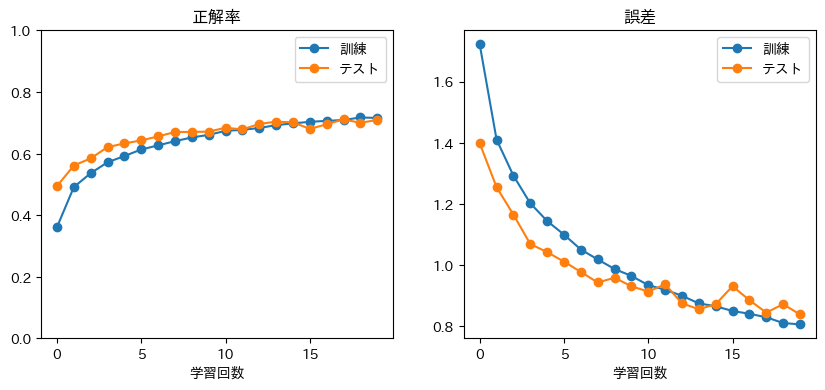

In [ ]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト5-21

313/313 [==============================] - 1s 2ms/step


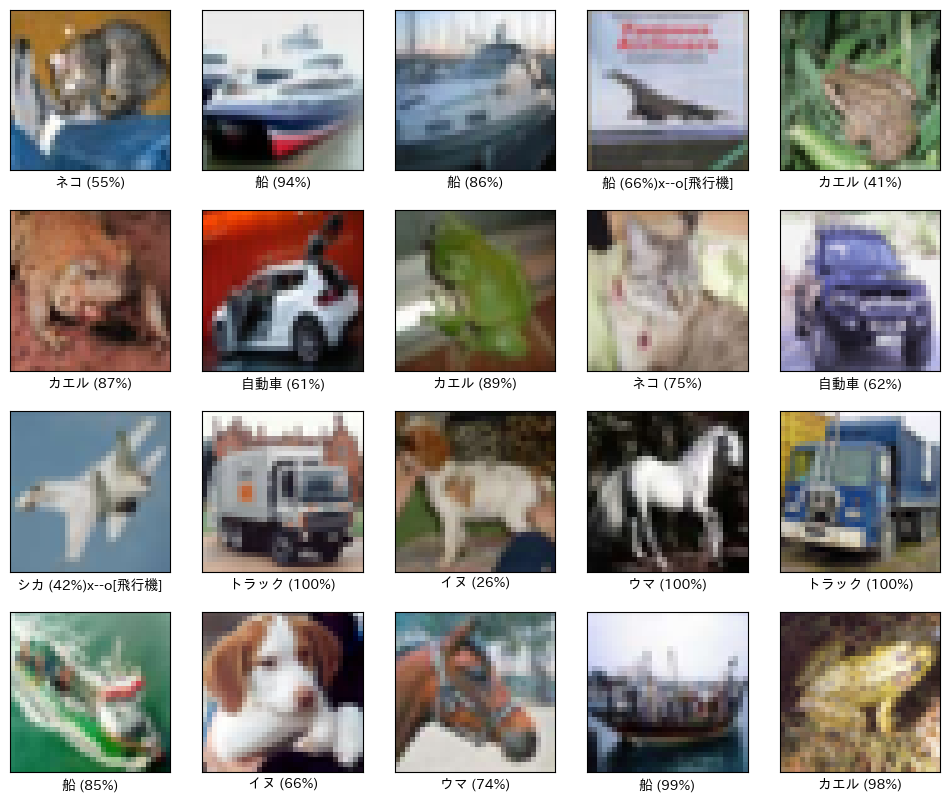

In [ ]:
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()

# 【中間層を視覚化】

リスト5-22

In [ ]:
hidden_layers = []
for i, val in enumerate(model.layers):
    print(f"{i} : {val.name}")
    hidden_layers.append(val.output)

hidden_model = keras.models.Model(inputs=model.inputs, outputs=hidden_layers)
outputs = hidden_model.predict(x_test)

0 : conv2d
1 : max_pooling2d
2 : dropout
3 : conv2d_1
4 : max_pooling2d_1
5 : dropout_1
6 : flatten
7 : dense
8 : dropout_2
9 : dense_1
10 : dense_2
313/313 [==============================] - 1s 2ms/step


リスト5-23

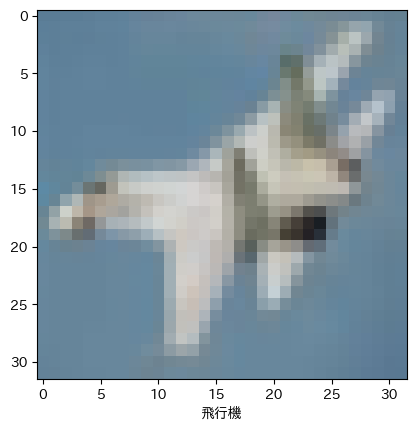

In [ ]:
i = 10
plt.imshow(x_test[i])
plt.xlabel(class_names[y_test[i][0]])
plt.show()

リスト5-24

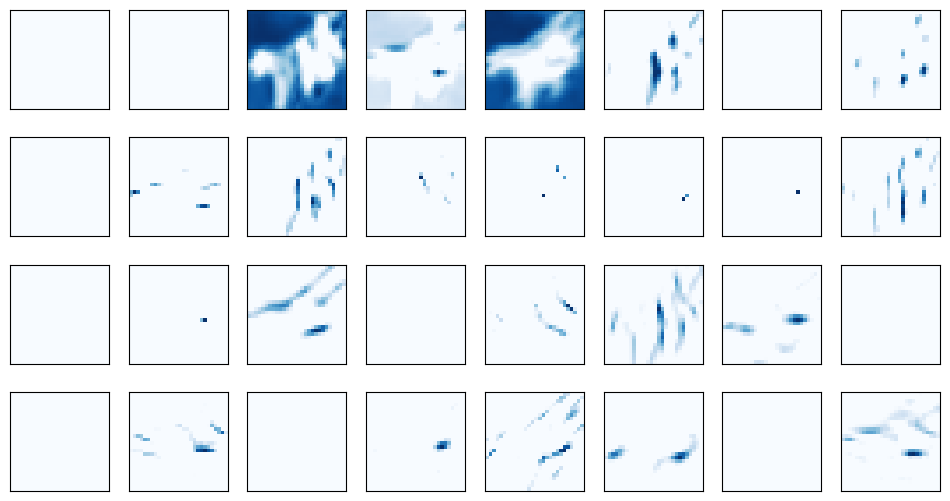

In [ ]:
def disp_hidden_data(data, w):
    plt.figure(figsize=(12,8))
    num = data.shape[2]
    for i in range(num):
        plt.subplot(int(num/w) + 1, w, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[:,:,i], cmap="Blues")
# 0 : conv2d
disp_hidden_data(outputs[0][i], 8)

リスト5-25

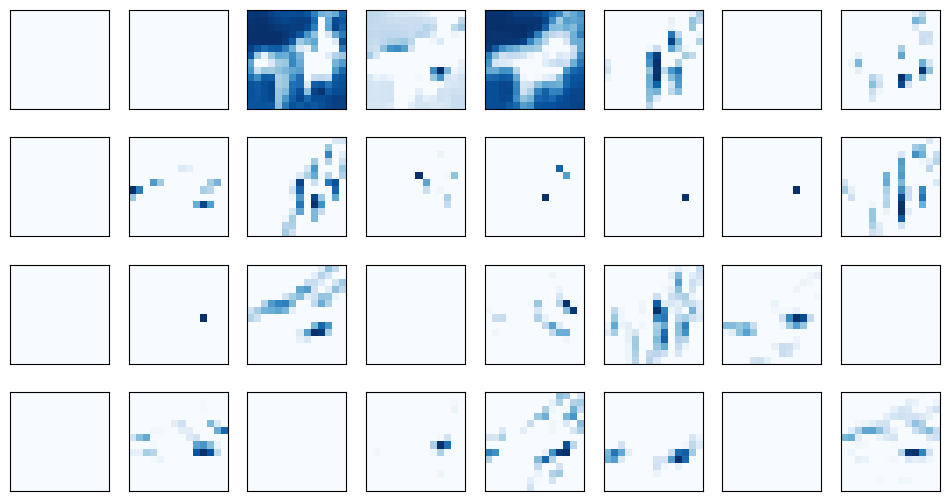

In [ ]:
# 1 : max_pooling2d
disp_hidden_data(outputs[1][i], 8)